# Potato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [1]:
pip install tensorflow keras matplotlib

In [2]:
pip install split-folders

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/


In [4]:
IMAGE_SIZE = 256
CHANNELS = 3

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
input_folder="/content/drive/MyDrive/Potato_Disease_Classification/PlantVillage"
output_folder="/content/drive/MyDrive/Potato_Disease_Classification/split_dataset"


In [7]:
import splitfolders

splitfolders.ratio(
    #'/content/PlantVillage',
    input_folder,                   # Input folder
    output=output_folder,           # Output folder
    seed=42,                        # Optional, for reproducibility
    ratio=(.8, .1, .1),             # Train, val, test split
    group_prefix=None               # Default: None, splits by file
)

Copying files: 2152 files [01:09, 30.78 files/s]


In [8]:
train_dataset="/content/drive/MyDrive/Potato_Disease_Classification/split_dataset/train"
validation_dataset="/content/drive/MyDrive/Potato_Disease_Classification/split_dataset/val"
test_dataset="/content/drive/MyDrive/Potato_Disease_Classification/split_dataset/test"

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        train_dataset,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1721 images belonging to 3 classes.


In [10]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [11]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [12]:
import scipy

In [13]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.5872679  0.5755032  0.6578561 ]
  [0.5833465  0.5715818  0.6539347 ]
  [0.5774909  0.5657262  0.64807916]
  ...
  [0.45822144 0.42292732 0.49743712]
  [0.41011053 0.37481642 0.44932622]
  [0.4098816  0.37458748 0.44909728]]

 [[0.587306   0.5755413  0.65789425]
  [0.58338463 0.5716199  0.65397286]
  [0.5776054  0.56584066 0.64819366]
  ...
  [0.42536807 0.39007396 0.46458375]
  [0.4033062  0.36801207 0.44252187]
  [0.4037641  0.36846998 0.44297978]]

 [[0.5737027  0.561938   0.6442909 ]
  [0.57568604 0.56392133 0.64627427]
  [0.57673955 0.56497484 0.6473278 ]
  ...
  [0.44791904 0.4126249  0.48713472]
  [0.44478923 0.40949512 0.4840049 ]
  [0.4450182  0.4097241  0.4842339 ]]

 ...

 [[0.603061   0.5795316  0.63443357]
  [0.6034044  0.579875   0.63477695]
  [0.5890598  0.5655304  0.6204324 ]
  ...
  [0.3811681  0.33410928 0.38901123]
  [0.39055818 0.34349936 0.39840132]
  [0.39702827 0.34996945 0.4048714 ]]

 [[0.58517605 0.56164664 0.6165486 ]
  [0.58483255 0.56130314 0.6162051 ]


In [14]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        validation_dataset,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [15]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        test_dataset,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


In [16]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.5970758  0.5539385  0.5853111 ]
  [0.5974347  0.55429745 0.58567   ]
  [0.58882874 0.5456915  0.57706404]
  ...
  [0.45982555 0.39708045 0.43629614]
  [0.48348442 0.42073932 0.459955  ]
  [0.48654017 0.42379507 0.46301076]]

 [[0.5802604  0.5371231  0.56849563]
  [0.58041424 0.537277   0.56864953]
  [0.5735103  0.53037304 0.5617456 ]
  ...
  [0.46018448 0.3974394  0.43665507]
  [0.48368952 0.42094442 0.4601601 ]
  [0.4862325  0.4234874  0.46270308]]

 [[0.5844446  0.54130733 0.5726799 ]
  [0.58429074 0.5411535  0.57252604]
  [0.58306104 0.5399238  0.57129633]
  ...
  [0.47484997 0.41210487 0.45132056]
  [0.48413095 0.42138585 0.46060154]
  [0.4774293  0.41468418 0.45389986]]

 ...

 [[0.6607971  0.6372677  0.69216967]
  [0.6334722  0.6099428  0.66484475]
  [0.6071486  0.5836192  0.63852113]
  ...
  [0.5434496  0.4963908  0.5512927 ]
  [0.54382926 0.49677044 0.5516724 ]
  [0.5435729  0.49651405 0.55141604]]

 [[0.65748835 0.63395894 0.6888609 ]
  [0.6262466  0.60271716 0.6576191 ]


## Building the Model

In [17]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
1506/32

47.0625

In [20]:
215/32

6.71875

In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 46s 805ms/step - accuracy: 0.4675 - loss: 0.9340 - val_accuracy: 0.5677 - val_loss: 0.7832
Epoch 2/20
 7/47 ━━━━━━━━━━━━━━━━━━━━ 11s 296ms/step - accuracy: 0.5741 - loss: 0.8210

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 190ms/step - accuracy: 0.6592 - loss: 0.7459 - val_accuracy: 0.7552 - val_loss: 0.6913
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7098 - loss: 0.6745 - val_accuracy: 0.8281 - val_loss: 0.4665
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - accuracy: 0.8320 - loss: 0.4560 - val_accuracy: 0.8229 - val_loss: 0.4133
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8254 - loss: 0.4261 - val_accuracy: 0.8906 - val_loss: 0.3100
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 161ms/step - accuracy: 0.8349 - loss: 0.3686 - val_accuracy: 0.8385 - val_loss: 0.3917
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8743 - loss: 0.3096 - val_accuracy: 0.9010 - val_loss: 0.2155
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - accuracy: 0.8862 - loss: 0.2873 - val_accuracy: 0.9375 - val_loss: 0.1964
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 669ms/step - accuracy: 0.8986 - loss: 0.2386 - val_accuracy: 0.9219 - val_loss:

In [22]:
scores = model.evaluate(test_generator)

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 705ms/step - accuracy: 0.9693 - loss: 0.0976


In [23]:
scores

[0.13633787631988525, 0.9444444179534912]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [24]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [25]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [26]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [27]:
type(history.history['loss'])

list

In [28]:
len(history.history['loss'])

20

In [29]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.8831269145011902,
 0.732761800289154,
 0.6131560206413269,
 0.4532434046268463,
 0.40770450234413147]

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [31]:
val_acc

[0.5677083134651184,
 0.7552083134651184,
 0.828125,
 0.8229166865348816,
 0.890625,
 0.8385416865348816,
 0.9010416865348816,
 0.9375,
 0.921875,
 0.9479166865348816,
 0.953125,
 0.9166666865348816,
 0.9739583134651184,
 0.9479166865348816,
 0.953125,
 0.9479166865348816,
 0.96875,
 0.9635416865348816,
 0.953125,
 0.9427083134651184]

In [32]:
acc

[0.5511022210121155,
 0.6741071343421936,
 0.7341349124908447,
 0.8303571343421936,
 0.8343353271484375,
 0.8303571343421936,
 0.8877755403518677,
 0.8883928656578064,
 0.9029255509376526,
 0.9032257795333862,
 0.914893627166748,
 0.9124423861503601,
 0.9352037310600281,
 0.96875,
 0.9445557594299316,
 0.9598214030265808,
 0.9438877701759338,
 0.9553571343421936,
 0.9398797750473022,
 0.9508928656578064]

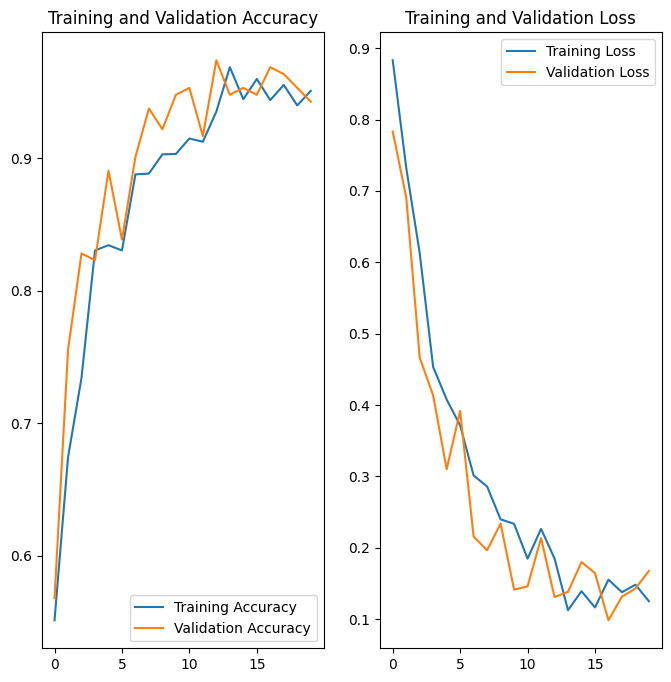

In [33]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

In [35]:
for image_batch, labels_batch in test_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
predicted label: Potato___Late_blight


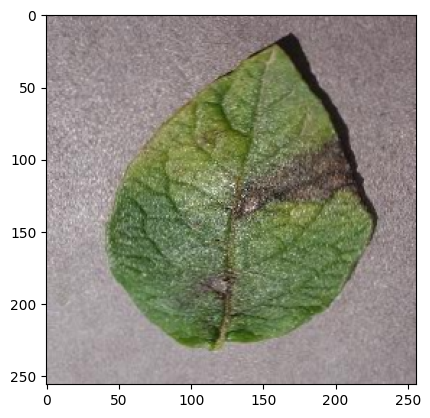

In [37]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

    break

### Write a function for inference

In [38]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

In [39]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

Output hidden; open in https://colab.research.google.com to view.

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [ ]:
model.save("../potatoes.h5")